<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import keras

from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [70]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [71]:
ytrain = train["label"]
xtrain = train.drop(labels = ["label"],axis = 1)

# normallization
xtrain = xtrain/255.0
test = test/255.0

xtrain = xtrain.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

ytrain = to_categorical(ytrain, num_classes = 10)

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.1)


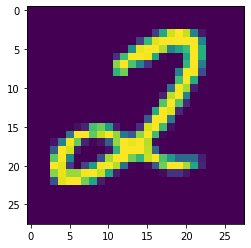

In [77]:
g = plt.imshow(xtrain[1][:,:,0])

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [74]:
from keras.optimizers import RMSprop,Adam

epochs = 30  # for better result increase the epochs
batch_size = 250


opt = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=["accuracy"])


In [75]:
history = model.fit(xtrain, ytrain, batch_size=batch_size,
                              epochs=epochs, validation_data=(xval,yval),
                              verbose=2, steps_per_epoch=xtrain.shape[0] // batch_size)

Epoch 1/30
151/151 - 10s - loss: 0.0186 - accuracy: 0.8608 - val_loss: 0.0046 - val_accuracy: 0.9712
Epoch 2/30
151/151 - 10s - loss: 0.0035 - accuracy: 0.9774 - val_loss: 0.0035 - val_accuracy: 0.9786
Epoch 3/30
151/151 - 10s - loss: 0.0027 - accuracy: 0.9831 - val_loss: 0.0034 - val_accuracy: 0.9783
Epoch 4/30
151/151 - 10s - loss: 0.0020 - accuracy: 0.9874 - val_loss: 0.0024 - val_accuracy: 0.9848
Epoch 5/30
151/151 - 10s - loss: 0.0018 - accuracy: 0.9885 - val_loss: 0.0038 - val_accuracy: 0.9769
Epoch 6/30
151/151 - 10s - loss: 0.0018 - accuracy: 0.9891 - val_loss: 0.0035 - val_accuracy: 0.9795
Epoch 7/30
151/151 - 14s - loss: 0.0021 - accuracy: 0.9873 - val_loss: 0.0035 - val_accuracy: 0.9788
Epoch 8/30
151/151 - 10s - loss: 0.0017 - accuracy: 0.9901 - val_loss: 0.0029 - val_accuracy: 0.9829
Epoch 9/30
151/151 - 10s - loss: 0.0017 - accuracy: 0.9897 - val_loss: 0.0026 - val_accuracy: 0.9850
Epoch 10/30
151/151 - 10s - loss: 0.0014 - accuracy: 0.9916 - val_loss: 0.0029 - val_accura

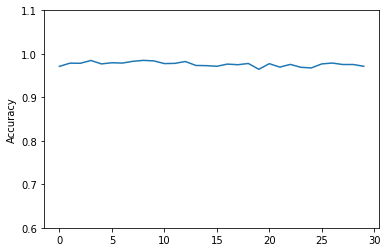

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.ylim([0.6,1.1])
plt.show()